### In this lab we will cover the following 
### concepts: 
Random Walks \\
Drift Diffusion Models \\

​
### tools: 
DDM in Psyneulink \\
​

# 7: Decisions & Drift Diffusion Models

There is an old saying that a donkey placed equidistant between two piles of hay will starve to death from [indecision](https://en.wikipedia.org/wiki/Buridan%27s_ass).  You could make a computational model of this behavior using a tree stump.  If only the donkey's decision making process involved some noise it would have survived!  Real decisions are often difficult to make, but unfold dynamically and are much more interesting to model than a scenario of being perpetually stumped.    

How many decisions do you make each day?  Depending on the day and how you decide what counts as a decision it could range from hundreds to thousands.  How many decisions does a squirrel make each day?  Perhaps more than you -- squirrels are in near constant motion -- foraging, avoiding being eaten by birds of prey, and generally consumed by the four Fs of survival (Food, Fight, Flight, sex).  Animals, including people, make decisions throughout waking life, weighing evidence relevant on multiple dimensions and timescales.  Although humans can use reason and are capable of considering vastly many more dimensions and longer timescales, it makes sense to start by modeling simple decisions.  And many of our simple decisions might be made using the same neural mechanisms that evolved in our near and distant ancestors.  You could investigate common origins of decision making using genetics, comparative neuroanatomy, and behavioral experiments.  Unifying the investigation requires a computational model that formalized the decision making parameters and processes, and for a variety of reasons selecting a drift diffusion model is an excellent decision.                            

### Why are drift diffusion models so useful?     

Decisions typically involve two or more options, one of which is correct or better than the others.  Decision making performance can be quantified in terms of accuracy (how often the correct or best option chosen) as well as speed (how long it takes to decide).  Accuracy and speed are typically at odds -- deciding faster means making more errors (a "speed/accuracy tradeoff" explored in this lab).  We can evaluate decision making in terms of speed, accuracy, and reward.

Drift diffusion models use mathematics originally developed in physics.  You start with a particle of gas in a confined space that jitters from Brownian motion (noise), then add a direction of motion to the air surrounding the particle (drift rate), and explore the time course of how the particle moves and when it is statistically likely to move a particular distance (cross a threshold).  The same parameters can be mapped onto key elements of decision making, replacing the particle with an undecided state, e.g. equidistant between two decision options (thresholds), the motion of air instead becomes the accumulation of evidence moving toward either of the options, and crossing a threshold is making a decision.  These simple parameters allow us to explore decision making speed and accuracy in considerable detail.  For example, we can define the optimal balance between speed and accuracy to maximize reward.  With optimality operationalized it is then possible to evaluate behavioral performance in terms of distance from optimal (the closer to optimal the better, of course).       

The required readings for this week are especially informative and relevant. Here's the link to Bogacz et al.: https://pdfs.semanticscholar.org/bbdd/99468b296c3be48601628ea164411a8b8c75.pdf

As Bogacz et al. (2006) explain, 

    "It has been known since Hernstein’s (1961, 1997) work that animals do not achieve optimality under all conditions, and in behavioral economics, humans often fail to choose optimally (e.g., Kahneman & Tversky, 1984; Loewenstein & Thaler, 1989). For example, in selecting among two items of comparable value and a cash payment worth less than either, participants often opt for cash, possibly to avoid a harder decision between two more valuable but similar items (Shafir & Tversky, 1995). **Such findings raise important questions: Is human decision making always suboptimal?** If it is not, under what conditions is it optimal? When it is suboptimal, does this reflect inherent deficiencies in decision-making mechanisms or other sources of systematic bias? Answers to such questions may provide insights into underlying neural mechanisms. However, to consider them, one must first describe optimal performance, against which actual behavior can be compared."

---
###  Exercise 1: Human Performance
Write down one example of when humans consistently behave subpotimally and one example of when they behave optimally.

---


---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 </h3>

---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 </h3>

---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 The Two Alternative Forced Choice (2AFC / TAFC) Task</h3>


The simplest form of decision making involves only two options (A OR B, deliberately excluding options of neither or both).  We refer to this scenario as the Two Alternative Forced Choice (2AFC / TAFC) Task.  Some survival-relevant examples of 2AFC are explore vs. exploit, and fight vs. flight.  A common lab 2AFC task involves lots of dots moving on a screen.  Some are moving leftward and some are moving rightward.  The participant's task on each trial is to determine which direction has more motion, LEFT or RIGHT.  The experimenter can manipulate the amount of evidence available: 51% left / 49% right is difficult, while 99% left / 1% right is very easy.  It is a good experiment for fine tuning task difficulty and measuring performance.  Experimenters can also vary the reward rate for correct trials (and/or penalty rate for incorrect trials) and the time delay between trials.  All of these experimental parameters can be accounted for in a drift diffusion model.      

Drift diffusion models allow you to simulate behavioral performance on a 2AFC task -- adjusting the parameters can produce data that are more-or-less indistinguishable from human performance on a variety of 2AFC tasks.  Below is a simple diagram of how the DDM works. A human has to respond to a stimulus by making one decision (such as "left") or another decision (such as "right"). In this example, the human sees the stimulus, and then takes some time to process that visual information.  Basic visual processing at the start of a trial and motor response processing at the end of a trial (as opposed to decision-relevant processing) is grouped together and called "non-decision time" (all depicted at the start of the trial in the diagram below). Once the stimulus is perceived, the agent accumulates evidence about the stimulus until it is sufficiently confident to choose decision 1 or decision 2.  This is a noisy process that unfolds over time (think about the 51% leftward / 49% rightward motion example above), so there is some variability in how long it takes the agent to accumulate sufficient evidence to make decisions.



### To err on the side of caution or respond quickly?

How do you know how quickly to respond? Bogacz et al. (2006) state,

    "The DDM is optimal in the sense that it is the fastest decision maker for a given level of accuracy. This assumes a fixed decision threshold, yet the model does not specify what this should be. Absent noise, thresholds have no effect on accuracy. However, with noisy data, accuracy increases as thresholds and decision times (DTs) rise because there is more time to average out uncorrelated noise. This produces a speed–accuracy trade-off: Lower thresholds produce faster but less accurate responding, whereas higher thresholds produce more accurate but slower responses. This speed–accuracy trade-off is critical for interpreting the results of most psychological experiments (Pachella, 1974; Wickelgren, 1977). For example, a manipulation intended to influence task difficulty, and thereby accuracy, could instead simply induce a change in response threshold, thereby changing RTs."

---
### Exercise 2: 
In your own words, define the following terms:
1. Decision threshold
2. The speed/accuracy tradeoff

---




As Bogacz et al. (2006) explain, 
    
    "..the TAFC and DDM have played important roles in human history: "In applying the DDM to the TAFC, we assume that the difference in the (noisy) information favoring each alternative is integrated over each trial and that a decision is reached when the resulting accumulated value crosses a critical threshold. Discrete analogues of the DDM were first applied to decision making in World War II, via the sequential probability ratio test (SPRT), the theory being developed independently by Barnard (1946) and Wald (1947; cf. Lehmann, 1959). (For histories, see DeGroot, 1988; Good, 1979; Wallis, 1980.) It was subsequently shown that the DDM and its discrete analogue, a directed random walk, describe accuracy and reaction times (RTs) in humans performing TAFC tasks (Laming, 1968; Ratcliff, 1978; Stone, 1960). In particular, DDM first passages account for a robust feature of human performance: RT distributions are heavily skewed toward longer times."

### Random Walk
A random walk starts at some point and at each time step moves some amount chosen at random -- usually the randomness is drawn from a bounded distribution centered around 0.  This process is cumulative, and it is possible to move far away from the starting point but if the random distribution is centered around 0 then moving far away typically takes many steps.  The following cell creates a random walk for you to explore.  Run the cell 5 times to see the different trajectories that get generated.  What is the furthest from 0 that any one of your random walks went?  What happens if you change the prob = [0.5, 0.5] to a different ratio, e.g. [0.1, 0.9]? 


### Random Walk in the context of DDM
Within a DDM the noise parameter is a random walk -- and a higher value of noise means taking bigger steps.  When we add a drift rate that adds a non-random motion component, so the drift rate moves the walk in a particular direction.  You can think of drift rate as accumulating signal, with noise added on top as a random component.   

In [0]:
!pip install psyneulink


Imports Successful
This will be our color palette


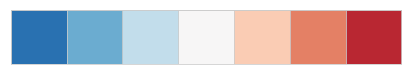

In [0]:
import matplotlib.pyplot as plt
import psyneulink as pnl
import numpy as np
import pandas as pd
import random as random
from matplotlib import pyplot

# This couple of lines sets our color palette
import seaborn as sb
sb.palplot(sb.color_palette("RdBu_r", 7))
sb.set_palette("RdBu_r",7)
sb.set_style("whitegrid")

print("Imports Successful")
print("This will be our color palette")

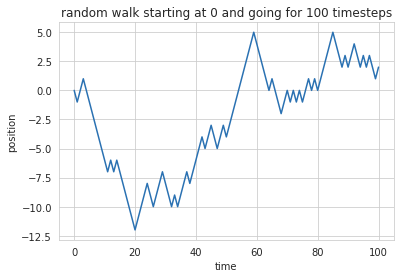

In [0]:
# Equal probability to move up or down
prob = [0.5, 0.5]  
 
# statically defining the starting position
start = 0
positions = [start]

 
# creating the random points
rr = np.random.random(100)
downp = rr < prob[0]
upp = rr > prob[1]
 
# bounds the walk at +/-100 (not relevant w/ 100 steps, but could set other bounds to explore more) 
for idownp, iupp in zip(downp, upp):
    down = idownp and positions[-1] > -100
    up = iupp and positions[-1] < 100
    positions.append(positions[-1] - down + up)
 

# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.xlabel('time')
plt.ylabel('position')
plt.title('random walk starting at 0 and going for 100 timesteps')
plt.show()



---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 </h3>

---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 </h3>

---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 </h3>

### Exercise 3: SPRT
Describe the sequential ratio probability test (SPRT) in your own words, and how it relates to the DDM.  See Bogacz et al. (2006) especially pages 702-703 for guidance.  

---





---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 </h3>

---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 </h3>

---
<h3 style="background: #256ca2; color: #e9e9e9">&#129504 et's build a drift diffusion integrator.</h3>


PsyNeuLink allows you to build drift diffusion models (DDMs) using pnl.DriftDiffusionIntegrator.

---
### Exercise 4: 
Define the parameters of pnl.DriftDiffusionIntegrator.

For help, go into the PsyNeuLink documentation (https://princetonuniversity.github.io/PsyNeuLink/DDM.html?) and read Ratcliff 1978: http://star.psy.ohio-state.edu/wp/pdf/Papers/psychrev78.pdf

*1. rate* 

*2. noise* 

*3. initializer* 

*4. t0* 

*5. time_step_size* 

*6. threshold* 

---




## Input to pnl.DriftDiffusionIntegrator

The input to a DDM reflects the stimulus, which can be neutral or provide evidence in favor of a decision -- evidence that accumulates over successive time steps.  

Imagine an experiment in which subjects have to respond with one of two buttons. They click the "R" button if they see more red dots, they click the "G" button if they see more green dots. 

Your integrator will get evidence from the visual system about whether the dots on the screen are red or green. Since DDMs model two choice decisions, we can model red evidence as evidence towards the "R" boundary. Let's assume the R boundary is above the starting point (aka positive bound) and the G boundary is below the starting point (aka negative bound).

When we set up the model this way, the valence of the stimulus determines which direction the integrator drifts in; negative evidence drifts towards the G boundary, positive evidence drifts towards the R boundary. 

To make this very concrete, five trials of all red stimuli could potentially be represented as:
np.array([1, 1, 1, 1, 1]).

And five trials of all green stimuli could be represented as:
np.array([-1, -1, -1, -1, -1]).

Now imagine that the five trials sample randomly from a distribution of colors that is 60% red and 40% green.  What arrays could represent this situation?  (There are several possibilities.  Why might you choose to represent the stimuli as [1, 0, 1, 0, 1] or [.6, .6, .6, .6, .6] or [.2, .2, .2, .2, .2]?)


## Exercise 5: Drift Diffusion Model (DDM) Parameter Questions

Think about these questions as you go through the exercises. If you don't know the answer to any of the questions, see if the following exercises help you understand the answers better.

1. Tasks vary in difficulty.  Under what task conditions would it be most realistic for your DDM to have a high drift rate?  What about a low drift rate?  
2. Assuming that you are modeling lots of individual trials, which kind of integrator would most likely produce the single fastest response time:  Holding all else constant, one with high noise or low noise?  Why?
3. Under what task conditions would the starting position of the integrator not be equidistant between the two possible decision thresholds?
4. Name two factors that influence the amount of non-decision time that goes into making each decision?
5. How does raising your threshold affect your accuracy? Under which task conditions would it be adaptive to raise your threshold?

## Let's make two different integrators!

The first integrator will drift toward a positive boundary; the second will drift toward a negative boundary. 

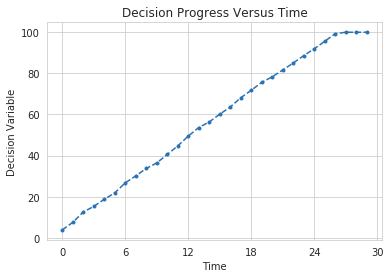

In [0]:
num_trials = 30;

# Instate the DDM mechanism
pos_integrator = pnl.DDM(function = pnl.DriftDiffusionIntegrator(
                              noise=0.5,
                              initializer=0,
                              starting_point=0,
                              rate=3.0
                            )
                         )


# Tell the DDM to store its outputs at each trial
pos_integrator.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Put the DDM into a composition
DDM_positive = pnl.Composition(name = 'DDM_positive')
DDM_positive.add_node(node = pos_integrator)

# Run it
DDM_positive.run(inputs={pos_integrator: np.random.normal(1,.5,(1,1,1))},
num_trials=num_trials,
execution_id='execid')

# Extract the logged data
log = pos_integrator.log.nparray_dictionary()['execid']
decision_pos = log[pnl.DECISION_VARIABLE]
time_pos = log[pnl.RESPONSE_TIME]

# Plot!
plt.plot(decision_pos[:,0,0],'.--')
plt.title('Decision Progress Versus Time')
plt.ylabel('Decision Variable')
plt.xlabel('Time')
plt.xticks(np.arange(0,num_trials+1,int(num_trials/5)))
plt.show()

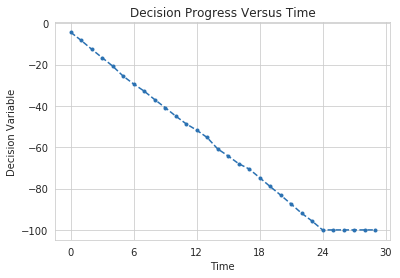

In [0]:
num_trials = 30;

# Instate the DDM mechanism
neg_integrator = pnl.DDM(function = pnl.DriftDiffusionIntegrator(
                              noise=0.5,
                              initializer=0,
                              starting_point=0,
                              rate=3.0
                            )
                         )

# Tell the DDM to store its outputs at each trial
neg_integrator.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Put the DDM into a composition
DDM_neg = pnl.Composition(name = 'DDM_negative')
DDM_neg.add_node(node = neg_integrator)

# Run it
DDM_neg.run(inputs={neg_integrator: -np.random.normal(1,.5,(1,1,1))},
num_trials=num_trials,
execution_id='execid')

# Extract the logged data
log = neg_integrator.log.nparray_dictionary()['execid']
decision_neg = log[pnl.DECISION_VARIABLE]
time_neg = log[pnl.RESPONSE_TIME]

# Plot!
plt.plot(decision_neg[:,0,0],'.--')
plt.title('Decision Progress Versus Time')
plt.ylabel('Decision Variable')
plt.xlabel('Time')
plt.xticks(np.arange(0,num_trials+1,int(num_trials/5)))
plt.show()

## Exercise 6: Integrator Questions


1. The integrator attribute .output_values returns two values. What do they mean? 
2. Explain the difference in outputs for the two accumulators.
3. How many time steps does it take for the positive integrator to meet a threshold of .5? What about a threshold of 10?
4. How could you make the positive integrator reach threshold faster? What would you do to each of the following: 
    4a. Threshold?
    4b. Drift rate?
    4c. Starting point?
    4d. Noise?

## Exercise 7: Integrate until threshold 

The following cell shows you how to run an accumulator until it reaches threshold using PsyNeuLink.

Rewrite this code so that it will take the example_positive_integrator and run until it hits threshold. Have your function return the time point at which your function hits threshold and the position of the decision at each time point. Plot the trajectory of the decision.

In [0]:
D = pnl.DDM(function = pnl.DriftDiffusionIntegrator(threshold=[20.0]))
positive_moving_stimulus = np.array([[[1]], [[1.5]], [[2]], [[1]], [[1.5]]])

D.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

C = pnl.Composition(name = 'DDM')
C.add_node(node = D)

C.termination_processing = {pnl.TimeScale.TRIAL: pnl.WhenFinished(D)}
C.run(inputs={D:positive_moving_stimulus} ,execution_id='execid') 

log = D.log.nparray_dictionary()['execid']
decisions = log[pnl.DECISION_VARIABLE]
times = log[pnl.RESPONSE_TIME]


## Exercise 8: Analytic solutions to the DDM

Review Bogacz et al (2006) to learn about analytic solutions to the DDM. 

1. Construct a Bogacz integrator using the same parameters of the pos_integrator. (Hint: this should look something like: pnl.DDM(name="example_ddm",function=pnl.DriftDiffusionAnalytical(drift_rate=?,starting_point=?, threshold=?, noise=?, t0=?))
2. Run your Bogacz integrator with 5 different kinds of input, once each; use these 5 values as the input: [[.5], [1], [1.5], [2], [2.5]].  Acquire the statistics for the distributions of RTs for these values using an output states dictionary and the additional output states available to the Bogacz DDM.
3. Now run the pos_integrator 100 times using integrate to threshold termination conditions.  Plot a histogram of your resulting RTs. Logging will not be necessary for this. Note: Predict what the histograms should look like before you generated them -- e.g. will the distributions be normally distributed, uniform, bimodal, or monolithic?   
4. Explain the pattern of RTs you observe.
5. How does the behavior of the  pos_integrator differ in its implementations as  an analytical and path integrator? (Hint: how does the Analytical function handle noise?)
6. Why is it useful to use the analytic functions instead of the integrator? 
7. When would you want to use the integrator instead of the analytic solution?

In [0]:
# This block of code handles parts 1 and 2

D = pnl.DDM(function = pnl.DriftDiffusionAnalytical(threshold=[20.0],
                                                   drift_rate = 3.0,
                                                   noise = 0.5),
           output_states = [pnl.DDM_OUTPUT.RESPONSE_TIME,pnl.DDM_OUTPUT.PROBABILITY_UPPER_THRESHOLD,pnl.DDM_OUTPUT.PROBABILITY_LOWER_THRESHOLD,pnl.DDM_OUTPUT.RT_CORRECT_MEAN	])
positive_stimulus = np.array([[[1.7]]])
#[[1.5]], [[2]], [[1]], [[1.5]]])

D.log.set_log_conditions(items=[pnl.DDM_OUTPUT.RESPONSE_TIME])  

C = pnl.Composition(name = 'DDM')
C.add_node(node = D)
outs = C.run(inputs={D:positive_stimulus}
                     ,num_trials = 10
                     ,execution_id='execid') 
print(outs)
print(C.output_values)   



[array([0.23769289]), array([1.]), array([0.]), array([1.16116878])]
[array([0]), array([0.5]), array([0.5]), array([1328.27354054])]


In [0]:
# This block of code handles parts 3 onward. Notice that we put the ENTIRE 
# declaration of the composition into a loop. If we don't do this, we will get 
# the same results every time. In other words, our results will be non-random.
n_t = 100
for i in range(1,n_t):
  
  D = pnl.DDM(function = pnl.DriftDiffusionIntegrator(threshold=[20.0],
                                                   rate = 0.0,
                                                   noise = 1.0))

  positive_stimulus = np.array([[[.7]]])


  C = pnl.Composition(name = 'DDM')
  C.add_node(node = D)

  C.termination_processing = {pnl.TimeScale.TRIAL: pnl.WhenFinished(D)}
  n_t = 10  


  outs = C.run(inputs={D:positive_stimulus}
                       ,execution_id='execid') 
  #print(outs)


[array([[20.]]), array([[680.]])]
[array([0]), array([0.])]
[array([[-20.]]), array([[1527.]])]
[array([0]), array([0.])]
[array([[-20.]]), array([[218.]])]
[array([0]), array([0.])]
[array([[-20.]]), array([[1158.]])]
[array([0]), array([0.])]
[array([[20.]]), array([[145.]])]
[array([0]), array([0.])]
[array([[20.]]), array([[354.]])]
[array([0]), array([0.])]
[array([[20.]]), array([[183.]])]
[array([0]), array([0.])]
[array([[-20.]]), array([[295.]])]
[array([0]), array([0.])]
[array([[-20.]]), array([[484.]])]
[array([0]), array([0.])]


## Exercise 9: Applying the DDM to data

How do the parameters of the DDM map on to reaction times in lab experiments and real life decision-making?

We have some hypothetical experimental data from different experimental conditions for you to analyze. In this task, subjects had to respond to the color or direction of moving stimuli. A cue would preceed each trial to indicate whether the trial was a color trial or direction trial.

Conditions:

A.

1. In condition A1, subjects get no penalties for wrong answers.
2. In condition A2, subjects get a penalty for responding incorrectly.

B. 

3. In condition B1, subjects saw stimuli with high coherence, so all the stimuli were one color, or they were all moving in the same direction.
4. In condition B2, subjects saw stimuli with low coherence, so the stimuli were composed of multiple colors, or they saw stimuli moving in multiple directions.


Q1. Build a single path integrator (not analytic) that corresponds to one of the response options for A1.  Then build the analogue for A2, differing by only one parameter.   Do the same for B1 and B2 (the parameter distinguishing B1 and B2 should be different than for A1 and A2).  (When you are done you will have 4 integrators.) 

Q2. Run 100 iterations of each integrator until it meets threshold, and plot the resulting RT distributions. 

Q3. Which parameter did you change for A and B?

Q4. How do your RT distributions compare to the actual data (plotted for you below)?

In [0]:
# This needs to be replaced by local images in Binder Version

# This line will copy some data off github
! git clone https://github.com/LenaRosendahl/lab7

Cloning into 'lab7'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [0]:
# These few lines will put you in the correct directory to access said data
!pwd
! ls
% cd /content/lab7
! pwd
!ls


/content
lab7  sample_data
/content/lab7
/content/lab7
Coherence.pkl  Penalties.pkl


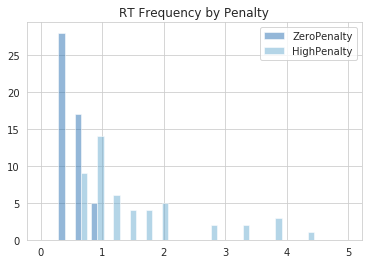

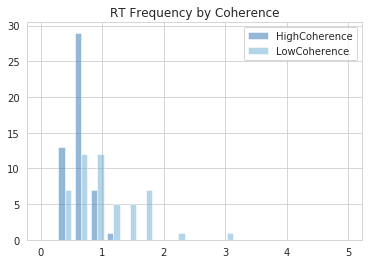

In [0]:
A = pd.read_pickle('Penalties.pkl')
B = pd.read_pickle('Coherence.pkl')

Ax = A.rt[A.condition == 'ZeroPenalty']
Ay = A.rt[A.condition == 'HighPenalty']
bins = np.linspace(0, 5, 20) # (start, stop, number of bins)
plt.hist([Ax, Ay], bins, alpha=0.5, label=['ZeroPenalty', 'HighPenalty'])
plt.title('RT Frequency by Penalty')
plt.legend(loc='upper right')
plt.show()

Bx = B.rt[B.condition == 'HighCoherence']
By = B.rt[B.condition == 'LowCoherence']
bins = np.linspace(0, 5, 20)
plt.hist([Bx, By], bins, alpha=0.5, label=['HighCoherence', 'LowCoherence'])
plt.title('RT Frequency by Coherence')
plt.legend(loc='upper right')
plt.show()



## DDM Errors

Sometimes, DDMs end up making the wrong decision.  This is increasingly likely to occur when the threshold is lower and/or noise is higher.  Let's look at how often the different models make incorrect decisions (0 is correct, and 1 is an error):


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


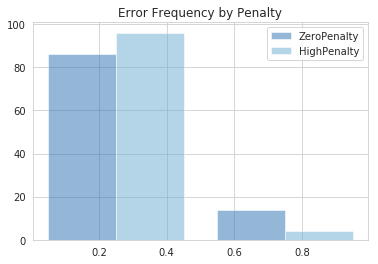

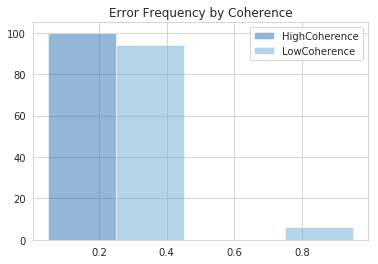

In [0]:
conds1 = A.condition == 'ZeroPenalty' 
conds2 = A.condition == 'HighPenalty' 

plt.figure()
resp = A.response == 0
Ax = conds1 & resp
Ay = conds2 & resp
bins = np.linspace(0, 1, 3)
plt.hist([Ax, Ay], bins, alpha = 0.5, label=['ZeroPenalty', 'HighPenalty'])
plt.title('Error Frequency by Penalty')
plt.legend(loc='upper right')
plt.show()


conds1 = B.condition == 'HighCoherence' 
conds2 = B.condition == 'LowCoherence' 
resp = B.response == 0
Bx = conds1 & resp
By = conds2 & resp
bins = np.linspace(0, 1, 3)

plt.figure()
plt.hist([Bx, By], bins, alpha=0.5, label=['HighCoherence', 'LowCoherence'])
plt.title('Error Frequency by Coherence')
plt.legend(loc='upper right')
plt.show()

## Bonus Exercise: Interpreting Errors

1. Look at the pattern of errors your models made in Exercise 9.  How are those errors similar and different compared to these data?
2. Why are there more errors for the zero penalty condition?
3. Why are there more errors for the low coherence condition?
